In [1]:
import pandas as pd
import os
#import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### cXVAE_inputEmbed
### XVAE_scGAN_multiclass
### corrReg: corrAbs, corrSq, MIhist, MIkd
### removeLatFeatures: cutoff_corr_05, cutoff_corr_03, cutoff_pvalue

In [9]:
model = "cutoff_corr_05" #"XVAE_scGAN_multiclass"
##PATH = f"/trinity/home/skatz/PROJECTS/Multi-view-Deconfounding-VAE/lightning_logs/confounded_categ2/stability/{model}"


# for XVAE vanilla
PATH = f"/data/scratch/skatz/PROJECTS/multiview_VAE/lightning_logs/confounded_categ2/stability/{model}"

In [10]:
df = pd.DataFrame()
for folder in os.listdir(f"{PATH}"):   ### XVAE_adversarialTrg
    try: 
        tmp = pd.read_csv(f"{PATH}/{folder}/epoch150/results_performance_vanillaXVAE.csv") ## cufoff_corr: results_performance_removeLatFeatures_pvalueCutoff.csv
        tmp["run"] = folder
        df = pd.concat([df, tmp], axis=0)
    except FileNotFoundError:
        print("Somethign went wrong")
        continue

In [11]:
df.shape

(50, 12)

In [12]:
df.to_csv("tmp.csv", index=False)

Text(0.5, 1.0, 'cutoff_corr_05')

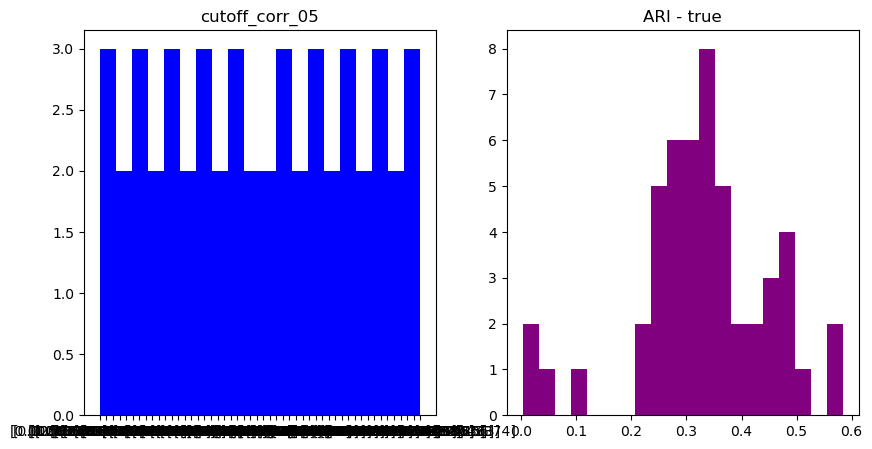

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(df["ari_confoundedCluster"], bins=20, color="blue")
ax2.hist(df["ari_trueCluster"], bins=20, color="purple")
#ax1.violin(df["ari_confoundedCluster"])
ax1.set_title("ARI - confounded")
ax2.set_title("ARI - true")
ax1.set_title(model)